# CASO 3 - PARK RAMIREZ


1) Caso sem aplicação das wavelets e com saída de gráficos

In [1]:
import numpy as np # General numerics
from scipy.integrate import odeint # Integration
from scipy.optimize import minimize # Optimization
import matplotlib.pyplot as plt # Plotting

ns=16
# Initial Snowball Conditions
x10 = 0 # Initial mass
x20 = 0 # Initial velocity
x30 = 1 # Initial radius
x40 = 5
x50 = 1
w0 = np.zeros(ns)
inte=7
tg=[0]*inte
data2=[0]*inte
w0 = np.zeros(ns)
for i in range(1,inte):
    t = np.linspace(0,15,ns+1)
    def state(y,t,w):
        x1,x2,x3,x4,x5 = y
        f = [ (4.75*(21.87*x4/((x4+0.4)*(x4+62.5)))/(0.12+(21.87*x4/((x4+0.4)*(x4+62.5)))))*(x2-x1)-w*x1/x5,
            (x4*np.exp(-5*x4)/(0.1+x4))*x3-w*x2/x5,
            (21.87*x4/((x4+0.4)*(x4+62.5)))*x3-w*x3/x5,
            -7.3*(21.87*x4/((x4+0.4)*(x4+62.5)))*x3+w*(20-x4)/x5,
            w];
        return f
    def objective(w0):
        y0 = [x10,x20,x30,x40,x50]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            y0=sol[-1]
        obj = -sol[-1][0]*sol[-1][4]
        return obj
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(0,2)]*ns, constraints=(), tol=None, callback=None,options={'disp':True})
    tg[i]=t
    data2[i] = np.ones(ns+1)*i
    w0=[]
    for o in range(0,ns): 
        w0.append(res.x[o])
        w0.append(res.x[o])
    plt.figure(i)
    plt.step(np.linspace(0,15,ns),res.x,'bo',LineWidth=2)
    plt.axis([0, 15, 0, 2])
    plt.xlabel("Time (h)")
    plt.ylabel("u(t)")
    plt.show()
    ns=ns*2
    
plt.figure(i+1)
plt.plot( tg[1], data2[1], 'bo-',LineWidth=2)
plt.plot( tg[2], data2[2], 'bo-',LineWidth=2)
plt.plot( tg[3], data2[3], 'bo-',LineWidth=2)
plt.plot( tg[4], data2[4], 'bo-',LineWidth=2)
plt.plot( tg[5], data2[5], 'bo-',LineWidth=2)
plt.plot( tg[6], data2[6], 'bo-',LineWidth=2)

plt.axis([0, 15, 0, 7])
plt.xlabel("Time (h)")
plt.ylabel("Iteration")

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30262355167943
            Iterations: 32
            Function evaluations: 591
            Gradient evaluations: 32


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.495390638233076
            Iterations: 38
            Function evaluations: 1308
            Gradient evaluations: 38


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.672679264262484
            Iterations: 58
            Function evaluations: 3834
            Gradient evaluations: 58


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.67726451058693
            Iterations: 47
            Function evaluations: 6116
            Gradient evaluations: 47


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.69438997143304
            Iterations: 90
            Function evaluations: 23228
            Gradient evaluations: 90


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.6944576597973
            Iterations: 6
            Function evaluations: 3095
            Gradient evaluations: 6


<Figure size 640x480 with 1 Axes>

Text(0,0.5,'Iteration')

2) Caso sem aplicação das wavelets com saída dos tempos

In [7]:
import numpy as np # General numerics
from scipy.integrate import odeint # Integration
from scipy.optimize import minimize # Optimization
import matplotlib.pyplot as plt # Plotting
import time
t1=time.clock()
ns=16
# Initial Snowball Conditions
x10 = 0 # Initial mass
x20 = 0 # Initial velocity
x30 = 1 # Initial radius
x40 = 5
x50 = 1
w0 = np.zeros(ns)
inte=7
w0 = np.zeros(ns)
for i in range(1,inte):
    t = np.linspace(0,15,ns+1)
    def state(y,t,w):
        x1,x2,x3,x4,x5 = y
        f = [ (4.75*(21.87*x4/((x4+0.4)*(x4+62.5)))/(0.12+(21.87*x4/((x4+0.4)*(x4+62.5)))))*(x2-x1)-w*x1/x5,
            (x4*np.exp(-5*x4)/(0.1+x4))*x3-w*x2/x5,
            (21.87*x4/((x4+0.4)*(x4+62.5)))*x3-w*x3/x5,
            -7.3*(21.87*x4/((x4+0.4)*(x4+62.5)))*x3+w*(20-x4)/x5,
            w];
        return f
    def objective(w0):
        y0 = [x10,x20,x30,x40,x50]
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],2), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            y0=sol[-1]
        obj = -sol[-1][0]*sol[-1][4]
        return obj
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(0,2)]*ns, constraints=(), tol=None, callback=None,options={'disp':True})
    w0=[]
    for o in range(0,ns): 
        w0.append(res.x[o])
        w0.append(res.x[o])
    ns=ns*2
    print(time.clock()-t1)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30262355167943
            Iterations: 32
            Function evaluations: 591
            Gradient evaluations: 32
5.601975310926668
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.495390638233076
            Iterations: 38
            Function evaluations: 1308
            Gradient evaluations: 38
25.131612171608285
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.672679264262484
            Iterations: 58
            Function evaluations: 3834
            Gradient evaluations: 58
107.5700807170462
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.67726451058693
            Iterations: 47
            Function evaluations: 6116
            Gradient evaluations: 47
343.5269329270236


KeyboardInterrupt: 

5) teste com novas funções wavelets

Haar (haar)
Daubechies (db)
Symlets (sym)
Coiflets (coif)
Biorthogonal (bior)
Reverse biorthogonal (rbio)
“Discrete” FIR approximation of Meyer wavelet (dmey)
Gaussian wavelets (gaus)
Mexican hat wavelet (mexh)
Morlet wavelet (morl)
Complex Gaussian wavelets (cgau)
Shannon wavelets (shan)
Frequency B-Spline wavelets (fbsp)
Complex Morlet wavelets (cmor)

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.302623764746635
            Iterations: 40
            Function evaluations: 754
            Gradient evaluations: 40
33.302623764746635


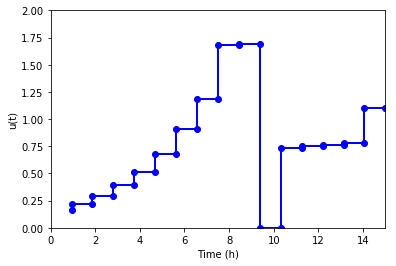

16
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.303518974854164
            Iterations: 28
            Function evaluations: 590
            Gradient evaluations: 28
2.771323202873847e-05


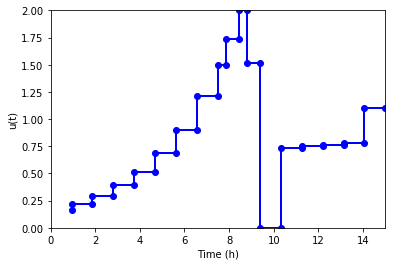

18
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.304141171864046
            Iterations: 47
            Function evaluations: 1072
            Gradient evaluations: 47
1.926096690476413e-05


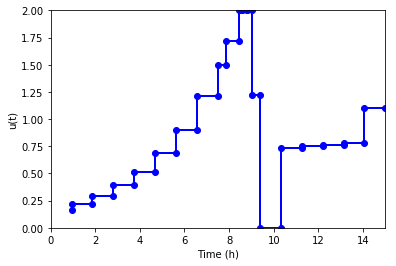

20
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30414188544951
            Iterations: 19
            Function evaluations: 485
            Gradient evaluations: 19
2.2089597141720274e-08


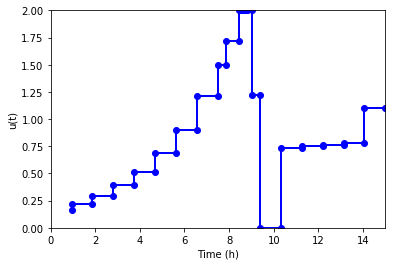

22
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30414247335064
            Iterations: 12
            Function evaluations: 339
            Gradient evaluations: 12
1.8198939596549665e-08


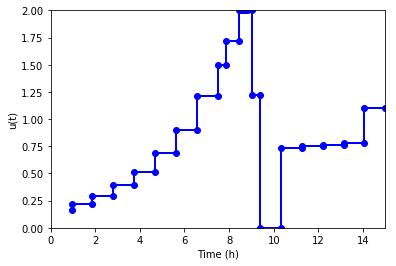

24
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30414296634857
            Iterations: 1
            Function evaluations: 36
            Gradient evaluations: 1
1.526113669287123e-08


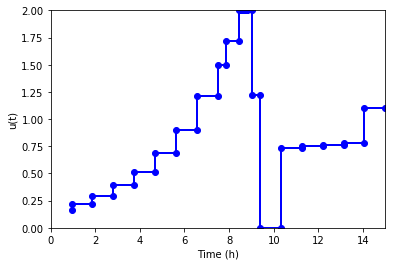

26
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30461833063193
            Iterations: 31
            Function evaluations: 1015
            Gradient evaluations: 31
1.4715273017946362e-05


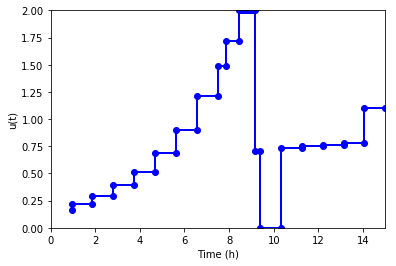

30
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30461962062991
            Iterations: 52
            Function evaluations: 1818
            Gradient evaluations: 52
3.9932308189001805e-08


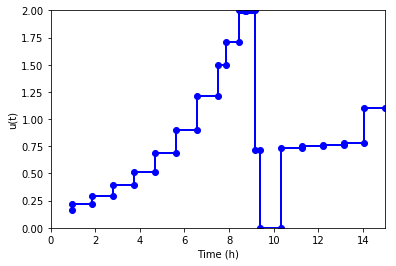

32
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462011214214
            Iterations: 1
            Function evaluations: 47
            Gradient evaluations: 1
1.521492088673283e-08


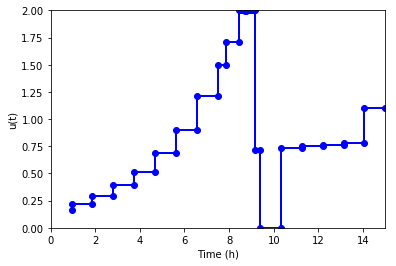

34
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.304620627870854
            Iterations: 3
            Function evaluations: 130
            Gradient evaluations: 3
1.596454974720815e-08


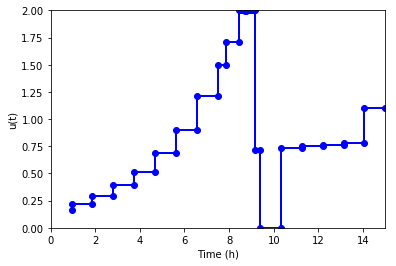

36
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462132521458
            Iterations: 34
            Function evaluations: 1403
            Gradient evaluations: 34
2.1586501121951674e-08


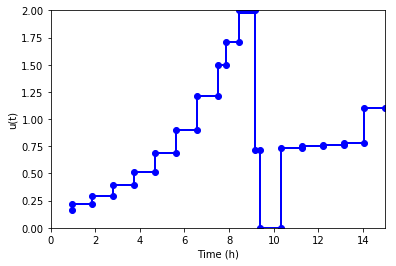

38
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462169018067
            Iterations: 4
            Function evaluations: 190
            Gradient evaluations: 4
1.1297643155970663e-08


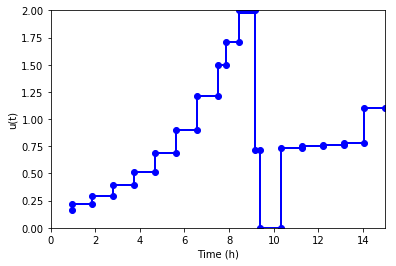

40
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462159647056
            Iterations: 1
            Function evaluations: 55
            Gradient evaluations: 1
2.9008266136077034e-09


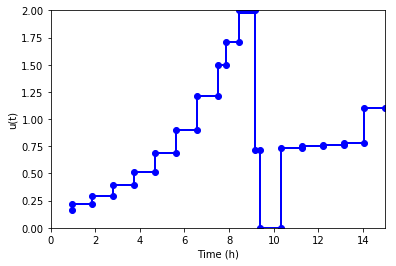

42
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462145064044
            Iterations: 1
            Function evaluations: 51
            Gradient evaluations: 1
4.51421852679762e-09


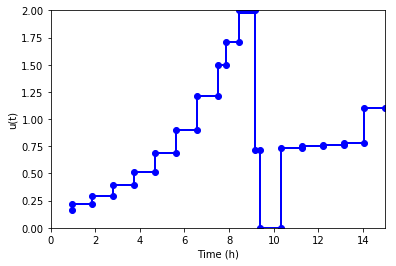

44
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462140139184
            Iterations: 1
            Function evaluations: 58
            Gradient evaluations: 1
1.5245062742423354e-09


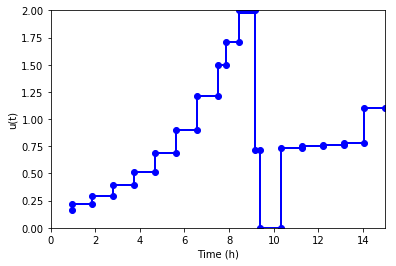

46
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462138443046
            Iterations: 1
            Function evaluations: 55
            Gradient evaluations: 1
5.250449972911085e-10


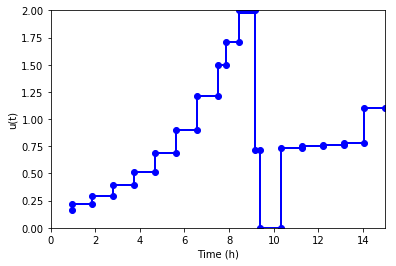

48
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462137846683
            Iterations: 1
            Function evaluations: 59
            Gradient evaluations: 1
1.84606247145192e-10


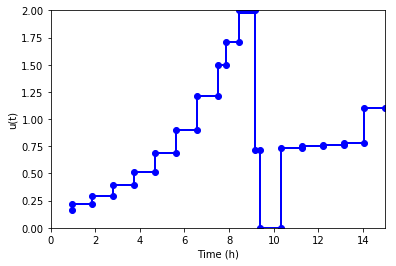

50
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462137634086
            Iterations: 1
            Function evaluations: 65
            Gradient evaluations: 1
6.580993959871603e-11


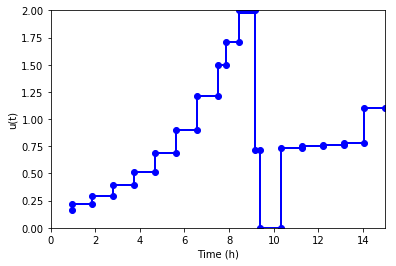

52
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462137558965
            Iterations: 1
            Function evaluations: 63
            Gradient evaluations: 1
2.325407851723592e-11


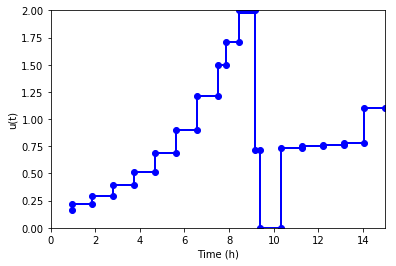

54
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -32.30462137534294
            Iterations: 1
            Function evaluations: 65
            Gradient evaluations: 1
7.636911772310203e-12


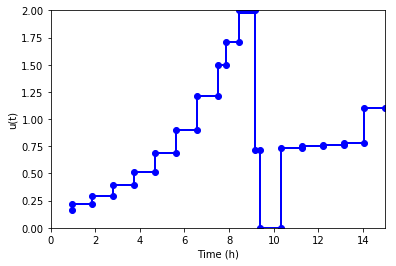

56


In [6]:
import numpy as np 
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pywt
import statistics

#Condições iniciais
ns=16 #numero de grids iniciais
x10 = 0
x20 = 0
x30 = 1
x40 = 5
x50 = 1

i=1

#variáveis para armazenar dados para plot
tg=[0]*i
data2=[0]*i
t = np.linspace(0,15,ns+1)
w0 = np.zeros(ns)
err=1
err1=1
tol=1e-11

while err>tol:
    
    #t = np.linspace(0,15,ns+1)
    #w0 = np.zeros(ns)
    def state(y,t,w):
        x1,x2,x3,x4,x5 = y
        f = [ (4.75*(21.87*x4/((x4+0.4)*(x4+62.5)))/(0.12+(21.87*x4/((x4+0.4)*(x4+62.5)))))*(x2-x1)-w*x1/x5,
            (x4*np.exp(-5*x4)/(0.1+x4))*x3-w*x2/x5,
            (21.87*x4/((x4+0.4)*(x4+62.5)))*x3-w*x3/x5,
            -7.3*(21.87*x4/((x4+0.4)*(x4+62.5)))*x3+w*(20-x4)/x5,
            w];
        return f

    def objective(w0):
        y0 = [x10,x20,x30,x40,x50]
        res=[];
        for ks in range(0, ns):
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            y0=sol[-1]
        obj = -sol[-1][0]*sol[-1][4]
        return obj
    
    res = minimize(objective,w0,method='SLSQP', jac=None, bounds=[(0,2)]*ns, constraints=(), tol=None, callback=None,options={'maxiter':100000000,'ftol':1e-10,'disp':True})
    y0 = [x10,x20,x30,x40,x50]
    err=abs((res.fun-err1)/err1)
    err1=res.fun
    w0 = res.x
    print(err)
        
    db1 = pywt.Wavelet('db1')
    maxlevel=pywt.dwt_max_level(len(res.x), db1)
    # mesmo se eu não usar o dwt_max_level o wavedec já calcula no max de níveis possiveis
    
    cD = pywt.wavedec(res.x, db1,mode='symmetric',level=maxlevel)
    t1=t
    Cdvr=statistics.pstdev(cD[-1])
    Thr=Cdvr*(2*np.log(len(cD[-1])))**(1/2)
    
    #cX=[x for x in abs(cD[-1]) if x > abs(Thr)]
    indx = np.where(abs(cD[-1])>abs(Thr))
    z=0
    for x in range(len(indx[0]),0,-1):
        x=x-1
        if indx[0][x]!=0:
            t=np.insert(t,indx[0][x]*2,(t[indx[0][x]*2-1]*0.6+t[indx[0][x]*2]*0.4))
            w0=np.insert(w0,indx[0][x]*2,w0[indx[0][x]*2-1])
            t=np.insert(t,indx[0][x]*2-1,(t[indx[0][x]*2-2]*0.6+t[indx[0][x]*2-1]*0.4))
            w0=np.insert(w0,indx[0][x]*2-1,w0[indx[0][x]*2+z-2])
        
        else:
            t=np.insert(t,indx[0][x]*2+1,(t[indx[0][x]*2]*0.6+t[indx[0][x]*2+1]*0.4))
            w0=np.insert(w0,indx[0][x]*2+1,w0[indx[0][x]*2])
        
        
    # Usei isso aqui somente para verificar a integração com o controle otimo
    for ks in range(0, ns):
         #   sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],5), args=(w0[ks],), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
            sol = odeint(state,y0,np.linspace(t[ks],t[ks+1],20), args=(w0[ks],))
            y0=sol[-1]
    
    #Plot u(t) vs tempo
    plt.figure(i)
    plt.step(t1[1:ns+1],res.x,'bo',LineWidth=2)
    plt.axis([0, 15, 0, 2])
    plt.xlabel("Time (h)")
    plt.ylabel("u(t)")
    plt.show()
    print(ns)
    #atualização do ns
    ns=len(t)-1
    i=i+1
